Shape of combined dataset: (294, 14)
  age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  40  1.0  2.0     140.0  289.0  0.0      0.0    172.0    0.0      0.0   
1  49  0.0  3.0     160.0  180.0  0.0      0.0    156.0    0.0      1.0   
2  37  1.0  2.0     130.0  283.0  0.0      1.0     98.0    0.0      0.0   
3  48  0.0  4.0     138.0  214.0  0.0      0.0    108.0    1.0      1.5   
4  54  1.0  3.0     150.0   -9.0  0.0      0.0    122.0    0.0      0.0   

   slope   ca  thal  target  
0   -9.0 -9.0  -9.0     0.0  
1    2.0 -9.0  -9.0     1.0  
2   -9.0 -9.0  -9.0     0.0  
3    2.0 -9.0  -9.0     1.0  
4   -9.0 -9.0  -9.0     0.0  

Accuracy: 0.7966101694915254

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85        38
         1.0       0.76      0.62      0.68        21

    accuracy                           0.80        59
   macro avg       0.79      0.76      0.77        59
weight

<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Elnaz\AppData\Local\Temp\ipykernel_15596\2611513151.py:31: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file, sep='\s+', names=column_names, engine='python')


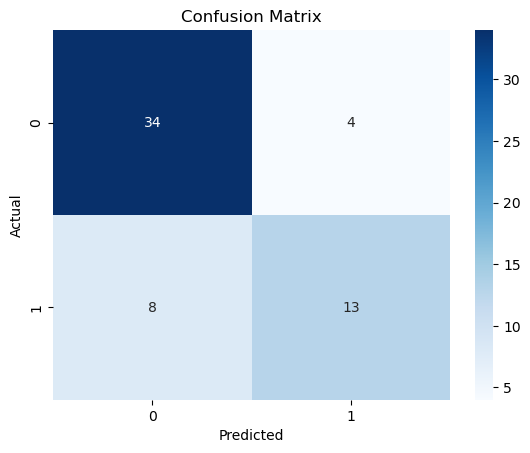


Discussion:
We combined data from Cleveland, Hungarian, Switzerland, and VA datasets after cleaning.
Naive Bayes was trained and evaluated. The final accuracy and classification metrics
provide a baseline for further model comparison in the project.

              precision    recall  f1-score   support

  No Disease       0.81      0.89      0.85        38
     Disease       0.76      0.62      0.68        21

    accuracy                           0.80        59
   macro avg       0.79      0.76      0.77        59
weighted avg       0.79      0.80      0.79        59

{0.0: 38, 1.0: 21}


In [10]:
# Title: Heart Disease Prediction
# Author: Elnaz Azizi

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Settings
np.random.seed(42)

# Column names based on dataset documentation
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load all processed datasets
files = [
    'processed.cleveland.data',
    'reprocessed.hungarian.data',
    'processed.switzerland.data',
    'processed.va.data'
]

datasets = []
for file in files:
    df = pd.read_csv(file, sep='\s+', names=column_names, engine='python')
    
    # Clean: replace '?' with NaN
    df = df.replace('?', pd.NA)
    
    # Drop missing values
    df = df.dropna()
    
    # Convert all data to numeric
    df = df.apply(pd.to_numeric)
    
    # Make target binary
    df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
    
    datasets.append(df)

# Combine all datasets
full_data = pd.concat(datasets, ignore_index=True)

# Check the final dataset
print("Shape of combined dataset:", full_data.shape)
print(full_data.head())

# Features and Target
X = full_data.drop('target', axis=1)
y = full_data['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Discussion
print("""
Discussion:
We combined data from Cleveland, Hungarian, Switzerland, and VA datasets after cleaning.
Naive Bayes was trained and evaluated. The final accuracy and classification metrics
provide a baseline for further model comparison in the project.
""")

# Evaluation of the Model, Disease or no Disease
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))

# Check for class imbalance
import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

